<h1>Conditional Agent</h1>

In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, END, START

In [ ]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int

In [11]:
def adder(state: AgentState) -> AgentState:
    """this node adds two numbers"""
    state['finalNumber'] = state['number1'] + state['number2']

    return state

def substractor(state: AgentState) -> AgentState:
    """this node substract two numbers"""
    state['finalNumber'] = state['number1'] - state['number2']

    return state

def decide_next_node(state: AgentState) -> AgentState:
    """this node will select the next node of the graph"""

    if state['operation'] == "+":
        return "addition_operation"

    if state['operation'] == "-":
        return "substraction_operation"


In [20]:
graph = StateGraph(AgentState)

graph.add_node("adder", adder)
graph.add_node("substractor", substractor)
graph.add_node("router", lambda state:state)

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_operation": "adder",
        "substraction_operation": "substractor"    
    }
)

graph.add_edge("adder", END)
graph.add_edge("substractor", END)

app = graph.compile()

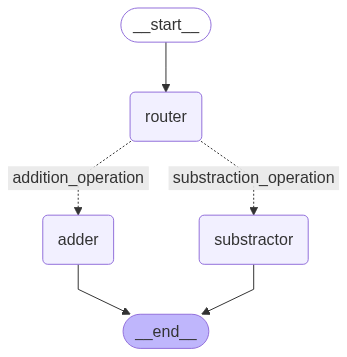

In [14]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [19]:
initial_state_one = AgentState(number1= 5, operation= "+", number2= 10)
print(app.invoke(initial_state_one))


{'number1': 5, 'operation': '+', 'number2': 10, 'finalNumber': 15}
